## Chapter 3. Deep Learning Fundamentals
### Deep learning algorithms and techniques
* **Multi-layer perceptrons (MLPs)**: neural networks with feed-forward propagation and fully connected layers, and at
least one hidden layer.
* **Convolutional neural networks (CNNs)**: feed-forward neural network with different types of specialized layers (i.e.
convolutional layers)
* **Recurrent networks**: networks that possess internal states based on all or part of the input data already in the
network. Their outputs are combinations of their internal states (memory) and of their latest inputs, while the latter
one also changes the internal state to a new one.
* **Autoencoders**: unsupervised learning algorithms whose output shape is the same as their input. Can be used as generative
networks.

### Training deep networks
Fortunately, nowadays it's possible to still use stochastic gradient descent-based tools and backpropagation to train
deep networks, and we will now introduce optimization to achieve this. Mainly, the concept of **momentum** will be introduced,
together with modern optimizations such as ```ADADELTA```, ```RMSProp``` and ```Adam```.

### Libraries
The basic features of the most popular deep learning libraries in Python, TensorFlow, Keras and PyTorch, will be discussed.
* The basic unit of data represention is the **tensor**, a generalization of a matrix whose mathematical details are beyond
the scope here. Typically, in these libraries, the data is represented in batches for performance reasons and because it 
also suits SGD-based computations. Practically, this means that data is represented in tensors whose dimensionality is
higher of one in respect of the basic data unit (i.e. if we work with 1D vectors, the data unit will be 2D tensors in which
the first dimension is the sample (batch) and the second is the only dimension of the actual 1D data; for grayscale images
the tensor will be 3D, with the additional dimension being the different samples, each one being a 2D matrix of luminance
values).
* Neural networks are represented as **computational graphs** of operations. The nodes represent operations, the edges 
represent the flow of data. Inputs and outputs of these operations are tensors.
* All these libraries include **automatic differentiation** (no derivatives to calculate!!)

#### TensorFlow
TensorFlow will automatically try to make use of GPUs. It has a somewhat steeper learning curve than the other libraries
presented. 

#### Keras
Keras is a higher-level library that runs on top of TensorFlow, CNTK or Theano. We'll use the TensorFlow backend. It will
also try to make use of GPUs.

#### PyTorch
You know it.

### Using Keras to classify handwritten digits

In [4]:
# Switched from tensorflow 1.xx to 2.xx, imports are different
# from keras.datasets import mnist
# from keras.models import Sequential
# from keras.layers.core import Dense, Activation
# from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

# Let's load the dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# Pre-process the data
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
# The labels indicate the value of the digit in the samples. Let's convert them to dummy variables/vectors.
classes = 10
Y_train = to_categorical(Y_train, classes)
Y_test = to_categorical(Y_test, classes)
# Let's set the size of the input layer (equal to the size of the MNIST images), the number of hidden neurons, the number
# training epochs and the mini batch size
input_size = 784  # 28 * 28 from the input images
batch_size = 100
hidden_neurons = 100
epochs = 100
# Define the net architecture
mdl = Sequential([
    Dense(units=hidden_neurons, input_dim=input_size),
    Activation('sigmoid'),
    Dense(classes),
    Activation('softmax')
])
# Cost function and optimization
mdl.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')
# train and fit now!
mdl.fit(x=X_train, y=Y_train, batch_size=batch_size, nb_epoch=epochs, verbose=1)
# Evaluate the model accuracy on the test data
score = mdl.evaluate(x=X_test, y=Y_test, verbose=1)
print('Accuracy: {}'.format(score[1]))

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 38us/sample - loss: 0.9979 - accuracy: 0.7488

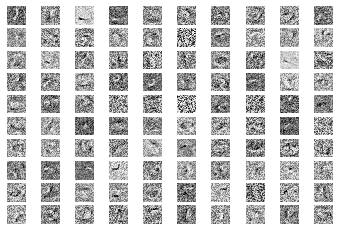

In [5]:
# Let's visualize how it went.
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

weights = mdl.layers[0].get_weights()

fig = plt.figure()

w = weights[0].T
for neuron in range(hidden_neurons):
    ax = fig.add_subplot(10, 10, neuron + 1)
    ax.axis("off")
    ax.imshow(np.reshape(w[neuron], (28, 28)), cmap=cm.Greys_r)
    
plt.savefig("neuron_images_MNIST.png", dpi=300)
plt.show()

### Using Keras to classify images of objects
We'll use the **CIFAR-10** dataset, consisting of 60000 32x32 RGB images in 10 classes (airplanes, cars, birds, cats,
deers, frogs, horses, ships and trucks).

In [3]:
# Switched from tensorflow 1.xx to 2.xx, imports are different
# from keras.datasets import mnist
# from keras.models import Sequential
# from keras.layers.core import Dense, Activation
# from keras.utils import np_utils
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

# load and preprocess
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_train = X_train.reshape(50000, 3072)
X_test = X_test.reshape(10000, 3072)

classes = 10
Y_train = to_categorical(Y_train, classes)
Y_test = to_categorical(Y_test, classes)

input_size = 3072
batch_size = 100
epochs = 100

mdl_cifar10 = Sequential([
    Dense(1024, input_dim=input_size),
    Activation('relu'),
    Dense(512),
    Activation('relu'),
    Dense(512),
    Activation('sigmoid'),
    Dense(classes),
    Activation('softmax')
])
# This time we'll run a validation set too
mdl_cifar10.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')
mdl_cifar10.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, Y_test), verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 80us/sample - loss: 2.1772 - accuracy: 0.1767 - val_loss: 2.0943 - val_accuracy: 0.2290

In [2]:
# Save the complete trained model
# mdl_cifar10.save('my_mdl_cifar10_1.h5')

In [6]:
import tensorflow as tf

print(tf.version)

# from keras.models import load_model
from tensorflow.keras.models import load_model

mdl_cifar10 = load_model('./my_mdl_cifar10_1.h5')

<module 'tensorflow_core._api.v2.version' from 'C:\\Users\\Luca\\Anaconda3\\envs\\py37ML2\\lib\\site-packages\\tensorflow_core\\_api\\v2\\version\\__init__.py'>


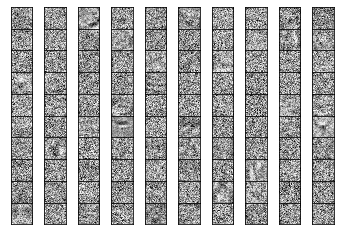

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import numpy as np
import random

PLT_TYPE = 'inline'  # restart Jupyter kernel before switching back to 'inline'

if PLT_TYPE.lower() == 'widget':
    %matplotlib widget
elif PLT_TYPE.lower() == 'inline':
    pass
elif PLT_TYPE.lower() == 'window':
    matplotlib.use('Qt5Agg')
    plt.ion()
else:
    raise SyntaxError("PLT_TYPE can either be 'inline', 'widget' or 'window")

fig = plt.figure()
outer_grid = gridspec.GridSpec(10, 10, wspace=0.0, hspace=0.0)

weights = mdl_cifar10.layers[0].get_weights()

w = weights[0].T

for i, neuron in enumerate(random.sample(range(0, 1023), 100)):
    ax = plt.Subplot(fig, outer_grid[i])
    ax.imshow(np.mean(np.reshape(w[i], (32, 32, 3)), axis=2), cmap=cm.Greys_r)
    ax.set_xticks([])
    ax.set_yticks([])
    fig.add_subplot(ax)
    
plt.show()